In [3]:
# Import several packages that will be used throughout

# numeric packages
import numpy as np
import scipy
import scipy.io
import pandas as pd

# filesystem and OS
import sys, os, time
import glob

# images
import skimage
import skimage
import skimage.io
import cv2

# plotting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

# these magics ensure that external modules that are modified are also automatically reloaded
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from skimage.feature import local_binary_pattern
from scipy.stats import itemfreq

In [9]:
experiment_dir = "/home/adalbert/data/world-cities/simulations/"

simulation_directories = [x[0] for x in os.walk(experiment_dir)][1:]

In [33]:
myfolder = simulation_directories[0]
files = glob.glob(myfolder + "/*.png")
print simulation_directories[0]

/home/adalbert/data/world-cities/simulations/Hu65_Gu2.40_Gr2.40_T0.18


In [31]:
len(files)

12

In [40]:
def compute_lbp(im):
    # Convert to grayscale as LBP works on grayscale image 12 
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
    radius = 3 # Number of points to be considered as neighbourers
    no_points = 8 * radius # Uniform LBP is used
    lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform') # Calculate the histogram
    x = itemfreq(lbp.ravel()) # Normalize the histogram
    hist = x[:, 1]/sum(x[:, 1]) # Append image path in X_name 
    
    return hist


TypeError: Image data can not convert to float

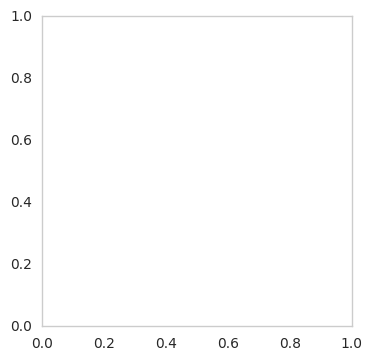

In [46]:
filename = files[2]
im = cv2.imread(filename) 
plt.imshow(im)
plt.show()

hist = compute_lbp(im)
plt.bar(range(len(hist)), hist)
plt.title(myfolder.split("/")[-1])

In [ ]:
filename = files[3]

hist = compute_lbp(filename)

plt.bar(range(len(hist)), hist)
plt.title(myfolder.split("/")[-1])